<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/Rabi_cavity_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
%matplotlib inline
!pip install qutip
import matplotlib.pyplot as plt
import numpy as np
from qutip import *
from scipy.constants import Boltzmann as k_B
from scipy.constants import elementary_charge as ec

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
wc = 1.0  * 2 * np.pi  # cavity frequency
wa = 1.0  * 2 * np.pi  # atom frequency
g  = 0.05 * 2 * np.pi  # coupling strength
kappa = 0.005          # cavity dissipation rate
gamma = 0.05           # atom dissipation rate
N = 15                 # number of cavity fock states
n_th_a = 0.0           # temperature in frequency units
use_rwa = True

tlist = np.linspace(0,25,100)

In [11]:
# Parameters
wc = 1.0  # cavity frequency
wa = 1.0  # atom frequency
g = 0.05  # coupling strength
N = 10  # number of cavity fock states
T = 0.1  # temperature
k_B = 1.380649e-23  # Boltzmann constant

# intial state
psi0 = tensor(basis(N,0), basis(2,1))    # start with an excited atom
# Operators
a = tensor(destroy(N), qeye(2))  # cavity annihilation operator
sm = tensor(qeye(N), destroy(2))  # spin lowering operator

# Choose an energy scale
E_scale = max(wc, wa, g)

# Calculate dimensionless coefficients
alpha = wc / E_scale
beta = wa / E_scale
gamma = g / E_scale
delta = k_B * T * np.log(1 - np.exp(-wa / (k_B * T))) / E_scale

# Define the Hamiltonian
if use_rwa:
    H_normalized = E_scale * (alpha * a.dag() * a + beta * sm.dag() * sm + gamma * (a.dag() * sm + a * sm.dag()) - delta * tensor(qeye(N), qeye(2)))
else:
    H_normalized = E_scale * (alpha * a.dag() * a + beta * sm.dag() * sm + gamma * (a.dag() * sm + a * sm.dag()) - delta * tensor(qeye(N), qeye(2)))


In [12]:
c_op_list = []

rate = kappa * (1 + n_th_a)
if rate > 0.0:
    c_op_list.append(np.sqrt(rate) * a)

rate = kappa * n_th_a
if rate > 0.0:
    c_op_list.append(np.sqrt(rate) * a.dag())

rate = gamma
if rate > 0.0:
    c_op_list.append(np.sqrt(rate) * sm)

In [13]:
output = mesolve(H_normalized, psi0, tlist, c_op_list, [a.dag() * a, sm.dag() * sm ])
#output = mesolve(H, psi0, tlist, c_op_list, [a.dag() * a, sm.dag() * sm - k_B * T * np.log(1 - np.exp(-wa / (k_B * T))) * tensor(qeye(N), qeye(2))])

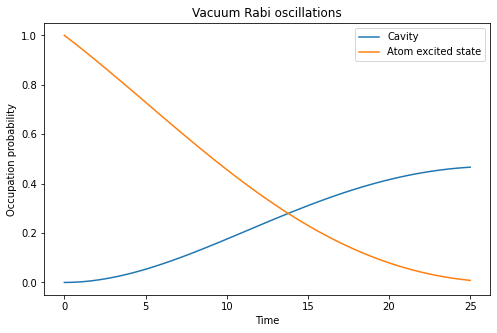

In [14]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(tlist, output.expect[0], label="Cavity")
ax.plot(tlist, output.expect[1], label="Atom excited state")
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Occupation probability')
ax.set_title('Vacuum Rabi oscillations');

In [15]:
t=100
t_idx = np.abs(tlist - t).argmin()
cavity_occ = output.expect[0][t_idx]
atom_exc = output.expect[1][t_idx]

print("Cavity occupation number at time t: ", cavity_occ)
print("Atom excited state occupation probability at time t: ", atom_exc)

Cavity occupation number at time t:  0.4663924447051962
Atom excited state occupation probability at time t:  0.008353852947031712
